In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
path=r'C:\Users\shett\OneDrive\Desktop\DataAnalysis\globalsupermarket\superstore.csv'
df=pd.read_csv(path)
df.head()
print(df.shape)
df.size

(51290, 27)


1384830

In [8]:
x=df['Profit'].mean()
print(x)

28.610982477675964


In [14]:
yearly=df.groupby('Year')['Sales'].sum()
print(yearly)

Year
2011    2259511
2012    2677493
2013    3405860
2014    4300041
Name: Sales, dtype: int64


In [28]:
x=yearly.pct_change()
y=x*100
print(y)
print(y.mean())

Year
2011          NaN
2012    18.498781
2013    27.203320
2014    26.254191
Name: Sales, dtype: float64
23.985431032859015


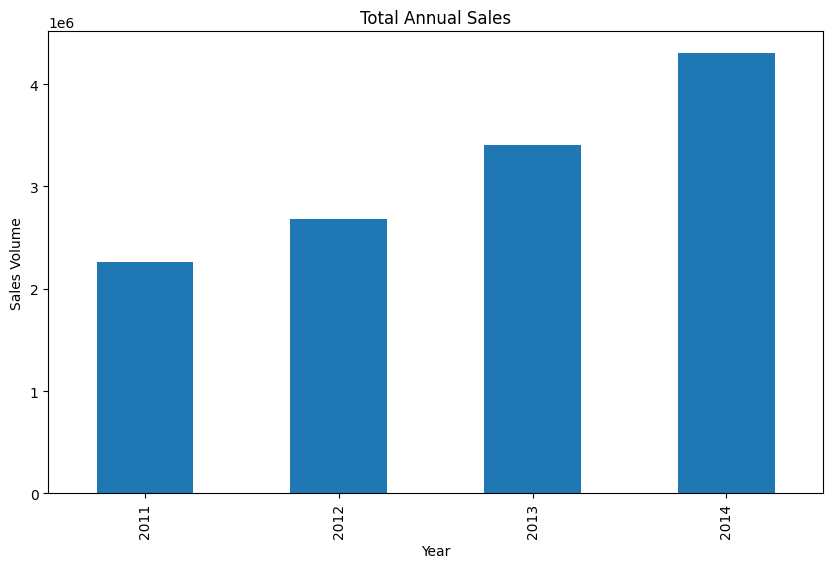

In [31]:

yearly.plot(kind='bar', figsize=(10, 6))
plt.title('Total Annual Sales')
plt.ylabel('Sales Volume')
plt.xlabel('Year')
plt.show()

Q's
Which are the top 10 most profitable products?

What is the sales trend over the years? Is the business growing?

Which customer segment (e.g., Consumer, Corporate) is the most profitable?

Which country generates the highest sales and profit?

What is the most popular shipping mode?

In [38]:
z=df['Product.ID'].value_counts()
print(z.head(10))
a=df['Segment'].value_counts()
print(a)


Product.ID
OFF-AR-10003651    35
OFF-AR-10003829    31
OFF-BI-10002799    30
OFF-BI-10003708    30
FUR-CH-10003354    28
OFF-BI-10002570    27
OFF-BI-10004140    25
OFF-BI-10003650    24
OFF-BI-10004632    24
OFF-BI-10001808    24
Name: count, dtype: int64
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64


In [40]:
segment_profits=df.groupby('Segment')[['Sales','Profit']].sum()
print(segment_profits)

               Sales        Profit
Segment                           
Consumer     6508141  749239.78206
Corporate    3824808  441208.32866
Home Office  2309956  277009.18056


In [48]:
country_profits=df.groupby('Country')[['Sales','Profit']].sum()
print(country_profits.sort_values(
    by=['Profit', 'Sales'], 
    ascending=[False, False]).head(10))

                  Sales        Profit
Country                              
United States   2297354  286397.02170
China            700591  150683.08500
India            589664  129071.83500
United Kingdom   528570  111900.15000
France           858930  109029.00300
Germany          628857  107322.82050
Australia        925257  103907.43300
Mexico           622620  102818.09752
Spain            287162   54390.12000
El Salvador      177565   42023.24320


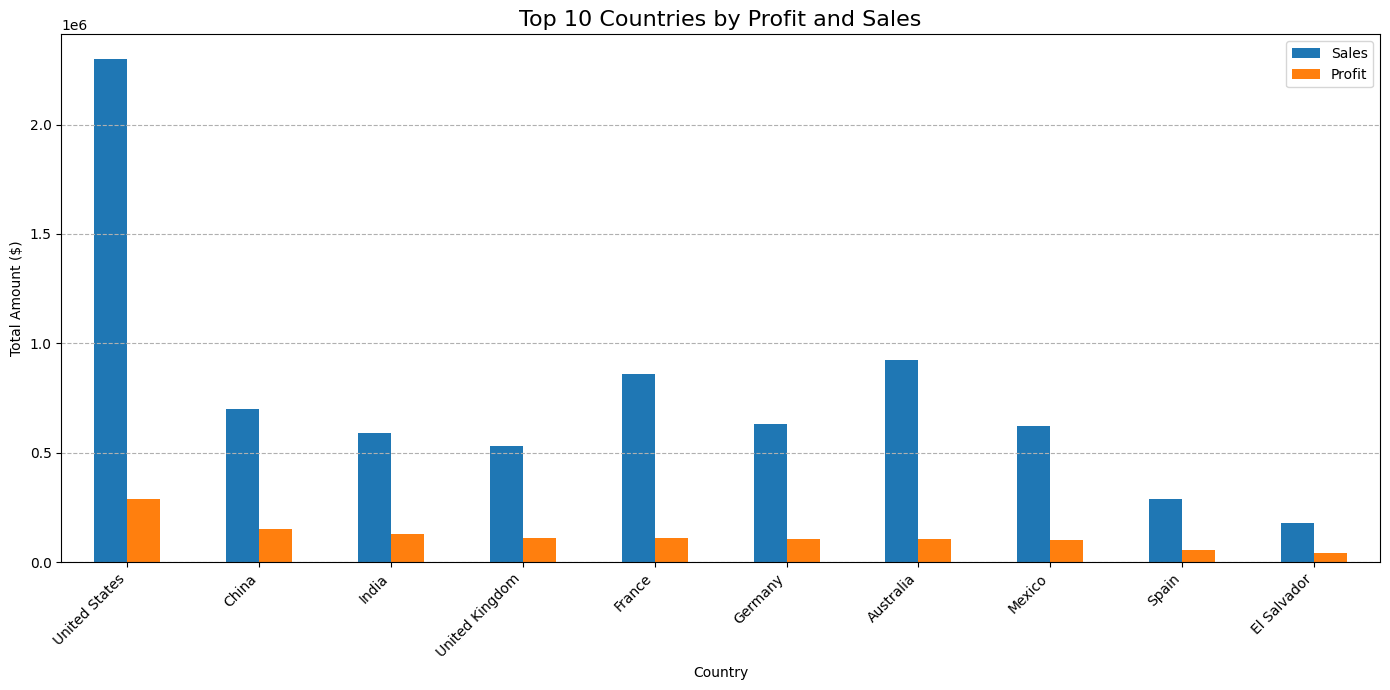

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'df' is your loaded DataFrame
country_profits = df.groupby('Country')[['Sales','Profit']].sum()

# Your code to get the top 10 countries is perfect
top_10_countries = country_profits.sort_values(
    by=['Profit', 'Sales'], 
    ascending=[False, False]
).head(10)

# Now, create the bar chart directly from this DataFrame
top_10_countries.plot(kind='bar', figsize=(14, 7))

# Add titles and labels for clarity
plt.title('Top 10 Countries by Profit and Sales', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45, ha='right') # Rotate country names for readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Adjust plot to prevent labels from overlapping

# Show the plot
plt.show()

In [51]:
popmode=df['Ship.Mode'].value_counts()
print(popmode)

Ship.Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64


In [ ]:
# Create a pie chart for yearly sales
plt.figure(figsize=(8, 8))
plt.pie(yearly, labels=yearly.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Year')
plt.ylabel('') # Hide the y-label as it's not needed for a pie chart
plt.show()